# Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

1. Start by fitting a linear regression model with target being life expectancy and predictor variable year.  
    a. What coefficients do you get? Interpret the meaning of these coefficents.  

- The intercept is -468.138, 
- The slope? is 0.267722. 
- The coefficient is positive. 
- For every year life expectancy increases by 0.2677 years? 

In [35]:
gdp_le = pd.read_csv('../data/gdp_le.csv')
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


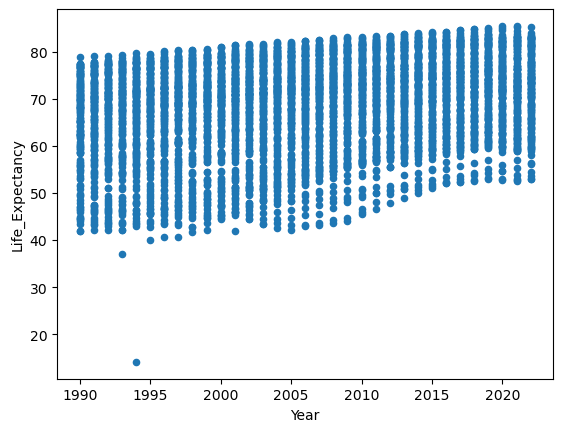

In [21]:
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy")
# this doesnt really show me anything useful. 

In [6]:
lr_lifeexp_year = smf.ols('Life_Expectancy ~ Year', data = gdp_le).fit()


In [8]:
lr_lifeexp_year.params

Intercept   -468.138140
Year           0.267722
dtype: float64

1b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?  
    

- I dont think what I did is correct.... 


need to get the year on the index
use set index ?



In [36]:
gdp_le.columns

Index(['Country', 'Year', 'GDP_Per_Capita', 'Continent', 'Life_Expectancy'], dtype='object')

In [39]:
gdp_le_i = gdp_le.set_index('Year', inplace = True)

KeyError: "None of ['Year'] are in the columns"

In [15]:
lr_lifeexp_year_gt1990 = smf.ols('Life_Expectancy ~ I(Year >= 1990)', data = gdp_le).fit()

In [16]:
lr_lifeexp_year_gt1990.params

Intercept                     34.505058
pb.I(Year >= 1990)[T.True]    34.505058
dtype: float64

In [18]:
lr_lifeexp_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        21:16:49   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -468.1381     26.087    -17.945      0.000    -519.279    -416.998
Year           0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                     4.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
lr_lifeexp_year_gt1990.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 17 Oct 2024   Prob (F-statistic):                nan
Time:                        21:17:08   Log-Likelihood:                -20154.
No. Observations:                5504   AIC:                         4.031e+04
Df Residuals:                    5503   BIC:                         4.032e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     34.5051      0.063    543.470      0.000      34.381      34.630
pb.I(Year >= 1990)[T.True]    34.5051      0.063    543.470      0.000      34.381      34.630
==============================================================================
Omnibus:                      440.641   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.278
Skew:                          -0.774   Prob(JB):                    7.20e-121
Kurtosis:                       3.120   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

1c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  
    

In [17]:
gdp_le['Life_Expectancy'].mean()

69.01011528644356

1d. Plot the actual values against your model's estimates for the mean life expectancy.  


1e. Inspect the R-squared value for the model. does it make sense, given the plot?  



2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.  
    a. What coefficients do you get? Interpret the meaning of those coefficients.  
    

2b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?  
    

2c. Are the coefficients statistically significant?  


2d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000?


2e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?



3. Now, fit a model for life expectancy based on the log of gdp per capita.  
    a. Inspect the coefficients for this model. Are they statistically significant?
    

3b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? What about for those with a gdp per capita of $100,000?
   

3c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?



4. Finally, return to the full dataset. 

a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.
    

4b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?
